In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import sys
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split

module_dir = '../DataGeneration/Python'
if module_dir not in sys.path:
    sys.path.append(module_dir)
    
import Sample
import Dataloader

In [9]:
DATASET_PATH = '../Dataset/CC10k.npy'
BATCH_SIZE = 32
D_MODEL = 64  
N_WORKERS = 0

# From data
d_input = 10+4*(10) # 10 Ages + 4 thermochronometers*(10 samples))
d_output = 7+3*5+5  # Output sequence 7 constants + 3 exhumation_history params * 5 rates + 5 uplift rates

In [10]:
geoData = Dataloader.formattedLoader(d_input, d_output, DATASET_PATH) # Get input data formatted for network
data_train, data_val, data_test = random_split(geoData, (9000, 500, 500))

dataloader_train = DataLoader(data_train, batch_size=BATCH_SIZE, shuffle=True, num_workers=N_WORKERS)

dataloader_val = DataLoader(data_val, batch_size=BATCH_SIZE, shuffle=True, num_workers=N_WORKERS)

dataloader_test = DataLoader(data_test, batch_size=BATCH_SIZE, shuffle=False, num_workers=N_WORKERS)

## Unformatted Data format = [$(H_{thermal}, Sample)$]

### $H_{thermal} = (\textbf{Age}, \textbf{AHe},  \textbf{AFT}, \textbf{ZHe},  \textbf{ZFT})$ where each thermochronometer's units is Km, representing the elevation at which you would find a sample of that age. See a plot below.

### $Sample$ is an object with the following instance fields that can be accessed via the `.` operator: 

${duration, n\_horizons, horizon\_dep, num\_events, uplift\_rate\_mean, uplift\_rate\_std, \textbf{exhumation\_history}}$
$\textbf{exhumation\_rates}, basement\_cond, surface\_hp, hp\_depth, surf\_hf, surf\_temp$

duration = 17.0
n_horizons = 10
horizon_dep = [5, 8, 11, 13, 15, 17, 19, 21, 23, 25]
num_events = 4
uplift_rate_mean = 1.5
uplift_rate_std = 1
exhumation_history = [[ 1.4  6.2  9.5]
 [ 7.6  4.5 11.2]
 [12.1  3.4  7.2]
 [15.5  4.5  5.6]]
exhumation_rates = [1.53, 2.48, 2.11, 1.24]
basement_cond = 2.7
surface_hp = 2.0
hp_depth = 35.0
surf_hf = 95.6
surf_temp = 0.0


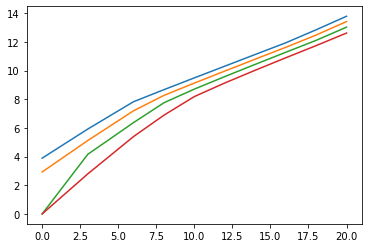

In [33]:
 = dat[0]
age, Ahe, Aft, ZHe, Zft = x[0] # Age/Elevation data for each system
x[1].summary() # Summary of model input that generated age/elevation data. 
plt.plot(age, Ahe)
plt.plot(age, Aft)
plt.plot(age, ZHe)
plt.plot(age, Zft)

In [57]:
i = x[0]
age, Ahe, Aft, ZHe, Zft = i

In [36]:



# Define embedding layer
embedding_layer = nn.Linear(d_input, D_MODEL)

# Define a batch of input data points
input_data = torch.randn(BATCH_SIZE, 10+4*(10))  
# Normalize the input
i = np.array([*x[0]])
i = ((i - np.mean(i, axis=1, keepdims=True)) / np.std(i, axis=1, keepdims=True)).flatten()

# Pass the inputs through the embedding layer
embeddings = embedding_layer(inputs)


array([(array([-0.,  3.,  6.,  8., 10., 12., 14., 16., 18., 20.]), [3.892, 5.922, 7.8260000000000005, 8.666, 9.49, 10.306000000000001, 11.122, 11.934000000000001, 12.842, 13.788], [2.928, 5.122, 7.192, 8.268, 9.126, 9.964, 10.794, 11.618, 12.476, 13.418000000000001], [0.002, 4.16, 6.368, 7.7540000000000004, 8.706, 9.58, 10.432, 11.272, 12.106, 13.028], [0.002, 2.7960000000000003, 5.394, 6.886, 8.186, 9.134, 10.022, 10.888, 11.738, 12.616]),
       <Sample.Sample object at 0x7fe159eed580>], dtype=object)